In [1]:
from settings import *

random_rho0s: setting seed=25520


In [2]:
qubits = TriangularLayoutAB(m=1, cutoff=1, distance=0.9)
operations = [("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

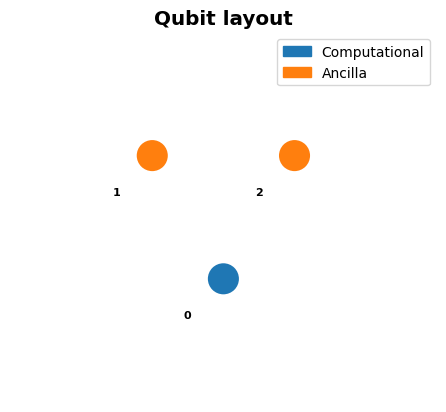

In [3]:
qubits.show_layout()

In [4]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=100)

np.save("both_theta_opt", theta_opt)
np.save("both_thetas", thetas)
np.save("both_errors", errors)

optimizer (optimization indices): setting seed=23344


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 0 
            Current gradient term: [-5.35064661e-03  1.38777878e-15  2.77555756e-15 -3.44485488e-02
 -2.56704238e-02 -2.56704238e-02  3.80758778e-02 -4.00574701e-02
 -4.00574701e-02 -1.71991413e-02  3.80758778e-02 -4.00574701e-02
 -4.00574701e-02 -5.39873691e-02  1.65360673e-04  1.65360673e-04
 -4.41545386e-02 -1.80639679e-02 -1.80639679e-02  1.25297719e-01
 -4.41545386e-02 -1.80639679e-02 -1.80639679e-02 -7.41043242e-02
 -2.77087451e-02 -2.77087451e-02  2.36887679e-02 -1.52477809e-02
 -1.52477809e-02 -5.24285682e-02  2.36887679e-02 -1.52477809e-02
 -1.52477809e-02 -4.80658579e-02  3.70503911e-03  3.70503911e-03
 -3.72106298e-02 -2.08709103e-02 -2.08709103e-02  1.36521359e-01
 -3.72106298e-02 -2.08709103e-02 -2.08709103e-02  4.44210601e-02
 -6.77331312e-03 -6.77331312e-03 -1.38867779e-02 -1.38777878e-15
  1.38777878e-15  3.98937682e-02] 
            Current error: 0.19679022508472943 
            Current sigma values: (0, 1, 10)
Iteration: 10 
            Current gradient

In [5]:
theta_opt = np.load("both_theta_opt.npy")
thetas = np.load("both_thetas.npy")
errors = np.load("both_errors.npy")

rho_rand_haar: seed=29626


c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

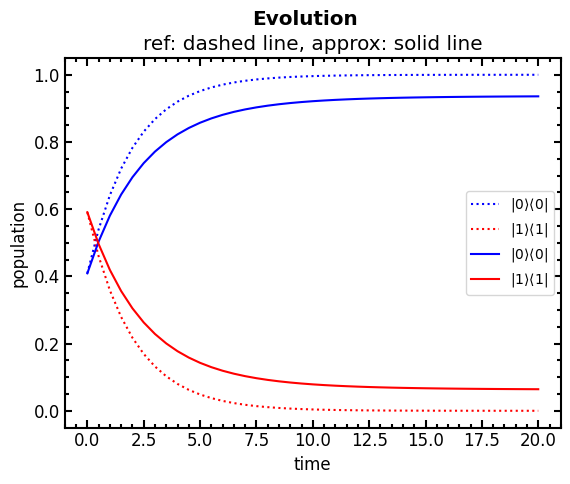

In [6]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

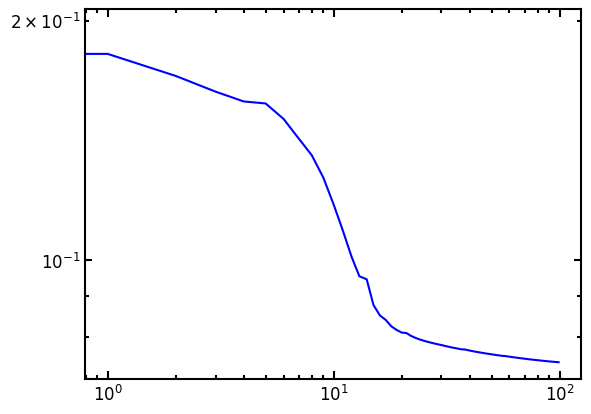

In [7]:
plt.loglog(errors)